## PCA

1. Reduce the size of the model.
2. Ensure features are independent of each other
    - PCA ensures all features are uncorrelated
    - PCA uses a linear combination of inputs as "new" features
3. Disadvantage : lose model interpretability.
4. How : By performing Eigen decomposition
5. Why ? 
    - PCA captures most of the variance in the data
    - Linear Transformation of linear independent variables.
6. Working with random data :
    - Cities and Avg Temp for months
    - Take one feature and plot for all the cities say (Avg High Temp Jan)
    <img src="images/pca1.png" height="50%" width="50%" align="center" />
    - Adding another dimension to the data
    <img src="images/pca2.png" height="75%" width="75%" align="center" />
    - Performs standardization and after shifting origin/ construction covariance
        * Closer distance from the origin
        * Other point would be **orthogonal** to the first line and distance would be from the origin
        <img src="images/pca3.png" height="50%" width="50%" align="center" />
        * First feature would be red line and other would be blue line.
7. Principal component means identifying the **axis of major variation**.
8. Number of principal components to use :
    1. Arbitary:
        * Any number which satisfies requirements is fine. e.g. Say 2 for plotting data on page.
    2. Proportion of variance explained:
        * Decide on amount of variance required to be explained by model.
    3. Elbow method
        * Graph "variance explained" method above
        * Look for an elbow in the graph
9. `from sklearn.decomposition import PCA`
10. Number of components would be equal to the minimum of rows x cols value.

## PCA on wikitemp dataset

In [7]:
import pandas as pd

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('dataset/wikitemps.csv')
df.drop(['Average'],axis=1,inplace=True)
df.head()

City  Mean High Jan  Mean High Feb  Mean High Mar  Mean High Apr  \
0  San Francisco           19.6           22.5           24.3           27.9   
1     Sacramento           17.8           21.4           24.9           30.7   
2     Manchester            7.3            7.6           10.0           12.6   
3          Paris            7.2            8.3           12.2           15.6   
4  Port-of-Spain           28.0           28.9           30.3           31.0   

   Mean High May  Mean High Jun  Mean High Jul  Mean High Aug  Mean High Sep  \
0           28.2           30.0           28.4           29.7           32.0   
1           35.4           39.1           40.6           39.8           37.8   
2           16.1           18.6           20.6           20.3           17.6   
3           19.6           22.7           25.2           25.0           21.1   
4           33.1           31.5           31.3           31.7           32.2   

   ...  Mean Low Mar  Mean Low Apr  Mean Low May  Mean Low Jun  Mean Low Jul  \
0  ...           6.4           7.3           8.7          10.1          10.8   
1  ...           1.7           3.3           6.1           9.3          11.7   
2  ...           3.3           4.9           7.7          10.5          12.6   
3  ...           5.3           7.3          10.9          13.8          15.8   
4  ...          20.7          22.0          23.0          23.3          23.0   

   Mean Low Aug  Mean Low Sep  Mean Low Oct  Mean Low Nov  Mean Low Dec  
0          11.4          11.1           9.8           6.8           4.5  
1          11.7           9.6           5.4           0.3          -1.9  
2          12.4          10.3           7.4           4.2           1.8  
3          15.7          12.7           9.6           5.8           3.4  
4          23.0          23.1          22.6          22.3          21.0  

[5 rows x 25 columns]

In [5]:
model = PCA(n_components=2)
model.fit(df.iloc[:,1:])
data2D = model.transform(df.iloc[:,1:])
data2D.shape

(10, 2)

In [10]:
# Variance explained
model.explained_variance_ratio_

array([0.61311446, 0.21703231])

/Users/shrikantkendre/miniforge3/envs/tf2M1/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


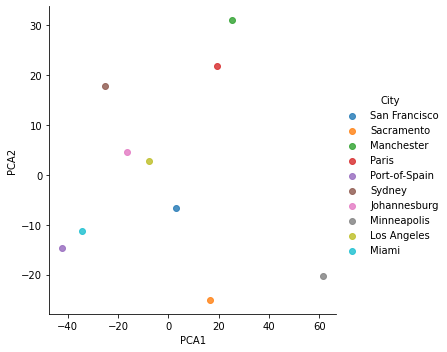

In [9]:
df['PCA1']=data2D[:,0]
df['PCA2']=data2D[:,1]
sns.lmplot('PCA1','PCA2',hue='City',data=df,fit_reg=False)
plt.show()